# IoT & Smart Analytics
## A Program by IIIT-H and TalentSprint

## Learning Objectives
At the end of the experiment, participants will be able to : 
* understand & implement Bagging  
* understand & implement Random Forest
* understand Feature Importance
* understand Confusion Matrix, Precision, Recall

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "P22I01E_test" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9876543456" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "Ensemble_II_Bagging_Random_Forest_GNB" #name of the notebook

def setup():
    ipython.magic("sx wget  https://cdn.extras.talentsprint.com/IOT/Data/diabetes.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "answer2" : Answer2,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://iot.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer1 Question")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer2 Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, recall_score,precision_score
from sklearn.utils import resample

#### Generating dataset & plotting

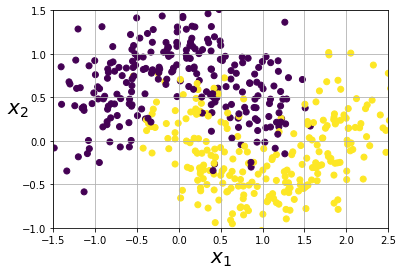

In [ ]:
X, y = sklearn.datasets.make_moons(500, noise=0.3,random_state=42) # check what happens,after changing noise = 0,.1,.2,.3
axes=[-1.5, 2.5, -1, 1.5] # how?
plt.scatter(X[:,0],X[:,1],c=y)
plt.axis(axes)
plt.grid(True, which='both')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.show()


#### Spliting the data set into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

#### Implementing Decision Tree Classifier

In [ ]:
Dt_clf = DecisionTreeClassifier(random_state=42)
Dt_clf.fit(X_train, y_train)
yp_Dt_clf = Dt_clf.predict(X_test)
print(accuracy_score(y_test, yp_Dt_clf))

0.856


#### Plotting Decision Boundary for DT
##### Making a function for plotting

In [ ]:
def decision_plot(clf,title):
  plt.figure(figsize=(8,6))
  ## Getting 10,000 equilspaced data points in the domain 
  axes=[-1.5, 2.5, -1, 1.5]
  x0s = np.linspace(axes[0], axes[1], 100) ## 100 Points on x axis
  x1s = np.linspace(axes[2], axes[3], 100) ## 100 Points on y axis
  x0, x1 = np.meshgrid(x0s, x1s)
  XX = np.c_[x0.ravel(), x1.ravel()]
  # predition 
  y_pred = clf.predict(XX).reshape(x0.shape)
  ## Plottiing decision boundary
  plt.scatter(x0, x1, c=y_pred,cmap=plt.cm.brg, alpha=0.1) # https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html
  ### Plotting original data points
  plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdGy)
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.title(title,fontsize=20)
  plt.xlabel(r"$x_1$", fontsize=20)
  plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
  plt.show()


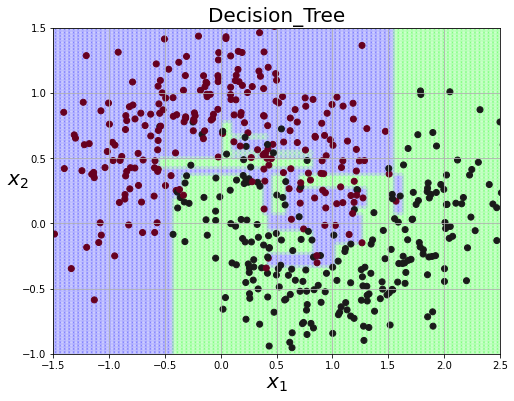

In [ ]:
decision_plot(Dt_clf,'Decision_Tree')

#### Implementing Bagging Classifier
* Same algorithm is used for all predictor but train them on different random subsets of the training set.
* When sampling is done with replacement, the method is called Bagging ( Bootstrap).
* When sampling is done without replacement, the method is called pasting.

In [ ]:
Bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,max_samples=100,bootstrap=True, random_state=42)
Bag_clf.fit(X_train, y_train)
yp_Bag_clf = Bag_clf.predict(X_test)
print(accuracy_score(y_test, yp_Bag_clf))

0.904


#### Plotting Decision Boundary for Bagging Classifier

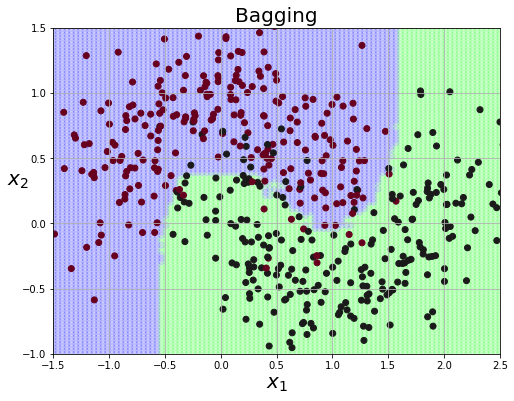

In [ ]:
decision_plot(Bag_clf,'Bagging')

#### Implementing RandomForest Classifier
* It is again the ensemble of decision tree,typically with max_sample set to the size of training set.
* Instead of building a BaggingClassifier and passing Decision Tree Classifier, we can instead use the RandomForestClassifier, which is more convenient and optimized for Decision Tree.
*It searches for the best feature among a random subset of features this results in an extra randomness when growing trees, generally yielding an overall better model.


In [ ]:
Rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,bootstrap=True,random_state=42)
Rnd_clf.fit(X_train, y_train)
yp_Rnd_clf = Rnd_clf.predict(X_test)
print(accuracy_score(y_test, yp_Rnd_clf))

0.912


#### Plotting Decision Boundary for Random Forest Classifier

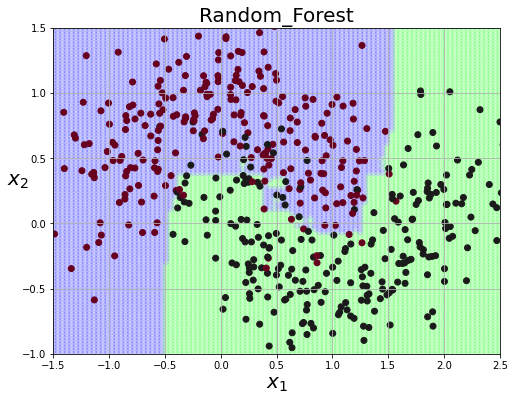

In [ ]:
decision_plot(Rnd_clf,'Random_Forest')

#### Understanding Confusion Matrix

In [ ]:
y_pred = yp_Rnd_clf

In [ ]:
# confusion matrix
print('confusion matrix: \n',pd.DataFrame(confusion_matrix(y_test, y_pred)),'\n')
# precision score
print('precision score: ',precision_score(y_test, y_pred))
# recall score
print('recall score: ',recall_score(y_test, y_pred))
# f1 score
print('f1 score: ',f1_score(y_test, y_pred),'\n')

confusion matrix: 
     0   1
0  58   3
1   8  56 

precision score:  0.9491525423728814
recall score:  0.875
f1 score:  0.9105691056910569 



In [ ]:
print(y_pred)
print(y_test)

[0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1
 0 0 1 1 0 0 0 0 1 1 1 0 0 0]
[1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 1 0 0 0]


### **Confusion Matrix**
![](https://cdn.extras.talentsprint.com/IOT/Images/confusion_matrix.png)
* **Precision** : Accuracy of the positive prediction:
   * $ Precision =TP/(TP+FP)  =(56)/(56+3)= 56/59=0.949 $
   *  Precision score = 0.949 : This means When the model claims an instance represents as 1 ,it is correct only 94.9 % of the time.
* **Recall**: Sensitivity or True positive rate (TPR)
   * $ Recall=TP/(TP+FN)=56/(56+8)=56/64= 0.875 $
   * Recall score = 0.875 : This means model can detects only 87.5 % of 1.
* **F1 score** = Harmonic mean of Precision and Recall.
  * $ 1/F1=(1/precision +1/recall)*(1/2)$ 
   *  $ F1 = 2* precision* recall/(precision + recall) $


#### Feature Importance
* Random forest measure the relative importance of each feature.
* In Scikit-Learn a feature's importance is measured by looking at how much
 the tree nodes that use that  feature reduce the impurity on average across all the tree in the forest.
 * Scikit-Learn computes this score automatically for each feature after training, then it scales the results so that the sum of all importance is equal to 1.

In [ ]:
iris = load_iris()
X=iris["data"]
y=iris["target"]
print(iris["feature_names"])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(X,y)
rnd_clf.feature_importances_


array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

In [ ]:
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name ,'-->', score)

sepal length (cm) --> 0.11249225099876375
sepal width (cm) --> 0.02311928828251033
petal length (cm) --> 0.4410304643639577
petal width (cm) --> 0.4233579963547682


#### Loading the diabetics dataset

#### Description
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. 

* Preg: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

In [ ]:
names = ['preg', 'glucose', 'pres', 'skin', 'insulin', 'mass', 'pedi', 'age', 'outcome']
diabetics = pd.read_csv("diabetes.csv", names=names)
diabetics.head()

,preg,glucose,pres,skin,insulin,mass,pedi,age,outcome
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
diabetics.drop(0,axis=0,inplace=True)
diabetics.head()

,preg,glucose,pres,skin,insulin,mass,pedi,age,outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   preg     768 non-null    object
 1   glucose  768 non-null    object
 2   pres     768 non-null    object
 3   skin     768 non-null    object
 4   insulin  768 non-null    object
 5   mass     768 non-null    object
 6   pedi     768 non-null    object
 7   age      768 non-null    object
 8   outcome  768 non-null    object
dtypes: object(9)
memory usage: 60.0+ KB


#### Convert data type  of columns into numeric

In [ ]:
## Your code here


In [ ]:
diabetics.dtypes

#### Split the data into train and test data

In [ ]:
## Your code here

#### Apply Random forest and print the accuracy score for test set

In [ ]:
## Youre code here

#### Generate the confusion matrix

In [ ]:
## Your code here

#### Calculate precision, recall and F1 score 
* Interpret the resuls.

In [ ]:
## Your code here

## Please answer the questions below to complete the experiment:




In [ ]:
#@title What is/are the additional property of random forest in comparison to bagging?  { run: "auto", form-width: "500px", display-mode: "form" }
Answer1 = "All of above" #@param ["","Bootstrap is used", "Any estimator can be used", "Subsets of features are used", "All of above"]


In [ ]:
#@title In the bagging classifier, we can not use any estimator other than the decision tree.{ run: "auto", form-width: "500px", display-mode: "form" }
Answer2 = "False" #@param ["","False", "True"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "hi" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Excellent" #@param ["","Excellent", "Very Good", "Good", "Average"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 82
Date of submission:  02 Apr 2022
Time of submission:  13:43:21
View your submissions: https://iot.iiith.talentsprint.com/notebook_submissions
